In [1]:
import pandas as pd

In [2]:
mobike_df = pd.read_pickle('../df/utseus-mobike-2016.pk')

In [3]:
mobike_df.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track
0,1,324731,7541,2016-08-28 00:00,121.49,31.28,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1..."
1,6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1..."
2,8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1..."
3,10,93155,12616,2016-08-28 00:00,121.436,31.32,2016-08-28 00:12,121.444,31.31,"121.436,31.318#121.436,31.319#121.436,31.320#1..."
4,11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.46,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1..."


In [5]:
import datetime
import time

In [6]:
values_start = {}
values_end = {}

In [7]:
temps1 = datetime.time(7,0,0)
temps2 = datetime.time(8,0,0)

In [8]:
print(temps1)

07:00:00


In [9]:
for orderid, start_time, end_time in zip(mobike_df['orderid'], mobike_df['start_time'], mobike_df['end_time']):
    start_date = datetime.datetime.strptime(start_time, '%Y-%m-%d %H:%M').time()
    end_date = datetime.datetime.strptime(end_time, '%Y-%m-%d %H:%M').time()
    
    if (start_date >= temps1) & (start_date <= temps2):
        values_start[orderid]=True
    else: values_start[orderid]=False
    
    if (end_date >= temps1) & (end_date >= temps2):
        values_end[orderid]=True
    else: values_end[orderid]=False

In [10]:
mobike_df['start_time_in_range'] = mobike_df['orderid'].apply(lambda x: values_start[x])
mobike_df['end_time_in_range'] = mobike_df['orderid'].apply(lambda x: values_end[x])

In [11]:
mobike_df.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,start_time_in_range,end_time_in_range
0,1,324731,7541,2016-08-28 00:00,121.49,31.28,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1...",False,False
1,6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1...",False,False
2,8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1...",False,False
3,10,93155,12616,2016-08-28 00:00,121.436,31.32,2016-08-28 00:12,121.444,31.31,"121.436,31.318#121.436,31.319#121.436,31.320#1...",False,False
4,11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.46,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1...",False,False


In [6]:
neighborhoods_df = pd.read_pickle('../df/utseus-cendus-shanghai-neighborhoods.pk')

In [7]:
from shapely.geometry import Point

In [9]:
mobike_df['geometry_start'] = [Point(xy) for xy in zip(mobike_df['start_location_x'].astype(float), mobike_df['start_location_y'].astype(float))]
mobike_df['geometry_end'] = [Point(xy) for xy in zip(mobike_df['end_location_x'].astype(float), mobike_df['end_location_y'].astype(float))]

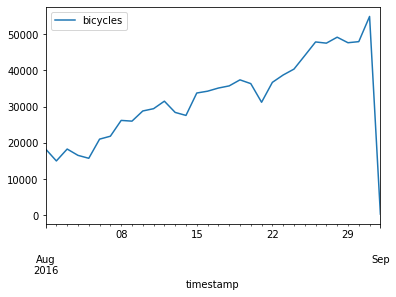

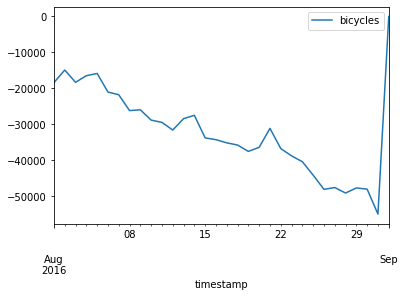

In [12]:
df_start = pd.DataFrame(pd.to_datetime(mobike_df['start_time']), )
df_start['bicycles']=-1
df_start = df_start.rename({'start_time':'timestamp'}, axis=1)
df_start = df_start.set_index("timestamp") #.resample("1d").sum().plot()

df_stop = pd.DataFrame(pd.to_datetime(mobike_df['end_time']))
df_stop['bicycles']=1
df_stop = df_stop.rename({'end_time':'timestamp'}, axis=1)
df_stop = df_stop.set_index("timestamp")

#«pd.concat([df_start]).resample("1d").sum().plot()

df_stop.resample("1d").sum().plot()
df_start.resample("1d").sum().plot()



In [13]:
df_stop = df_stop.resample("1d").sum()

In [14]:
df_start = df_start.resample("1d").sum()

In [16]:
df_start.head()

,bicycles
timestamp,
2016-08-01,-18392
2016-08-02,-14901
2016-08-03,-18306
2016-08-04,-16472
2016-08-05,-15850


In [17]:
pd.to_datetime(mobike_df['start_time']).head()

0   2016-08-28
1   2016-08-28
2   2016-08-28
3   2016-08-28
4   2016-08-28
Name: start_time, dtype: datetime64[ns]

In [18]:
neighborhoods_df.head()

,NAME,TYPE,geometry
0,??,2,POLYGON Z ((121.4216787977396 30.6847124112995...
1,???,2,POLYGON Z ((121.4119888989075 30.6937387337238...
2,???,2,POLYGON Z ((121.4016307330431 30.7071734919907...
3,????,2,POLYGON Z ((121.3368669670694 30.7380603821550...
4,????,2,POLYGON Z ((121.2514316037695 30.7917653095429...


In [19]:
import geopandas as gpd

In [20]:
ngdf = gpd.GeoDataFrame(neighborhoods_df, geometry='geometry')
ngdf.crs='+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

In [21]:
from shapely.geometry import Point, Polygon

In [22]:
poly = ngdf['geometry'][0]
def recreate_polygon(poly):
    x,y = poly.exterior.coords.xy
    p = []
    for i in range(0,len(x)):
        p.append((x[i],y[i]))
    return Polygon(p)

In [23]:
ngdf['new_geometry'] = ngdf['geometry'].apply(recreate_polygon)
neighborhoods_gdf = gpd.GeoDataFrame(ngdf['new_geometry'], geometry='new_geometry')

In [24]:
mobike_gdf = gpd.GeoDataFrame(mobike_df, geometry='geometry_start')
mobike_gdf.crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

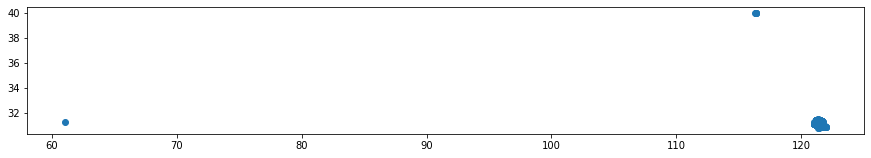

In [25]:
mobike_gdf.plot(figsize=(15,10))

In [ ]:
##for i, p in ps:
##    len(bikeid.loc(mobikegdf[mobikegdf.point.within(mobikegdf.geometry)]).unique)
for i, poly in neighborhoods_df['geometry'].items():
    print(mobike_gdf.geometry_start.within(poly).unique())
    neighborhoods_df.at[i, "mobike_available"] = len(mobike_gdf.bikeid.loc[mobike_gdf.geometry_start.within(poly).unique()])

In [95]:
neighborhoods_df

,NAME,TYPE,geometry,new_geometry,mobike_available
0,??,2,POLYGON Z ((121.4216787977396 30.6847124112995...,"POLYGON ((121.4216787977396 30.68471241129954,...",0.0
1,???,2,POLYGON Z ((121.4119888989075 30.6937387337238...,"POLYGON ((121.4119888989075 30.69373873372381,...",0.0
2,???,2,POLYGON Z ((121.4016307330431 30.7071734919907...,"POLYGON ((121.4016307330431 30.70717349199074,...",0.0
3,????,2,POLYGON Z ((121.3368669670694 30.7380603821550...,"POLYGON ((121.3368669670694 30.73806038215502,...",0.0
4,????,2,POLYGON Z ((121.2514316037695 30.7917653095429...,"POLYGON ((121.2514316037695 30.79176530954291,...",0.0
5,???,2,POLYGON Z ((121.361791867899 30.80039372730244...,"POLYGON ((121.361791867899 30.80039372730244, ...",0.0
6,???,2,POLYGON Z ((121.1946455066587 30.8145337554495...,"POLYGON ((121.1946455066587 30.81453375544953,...",0.0
7,???,2,POLYGON Z ((121.2968222983408 30.8189104622134...,"POLYGON ((121.2968222983408 30.81891046221345,...",0.0
8,???,2,POLYGON Z ((121.3671342033205 30.8431074654533...,"POLYGON ((121.3671342033205 30.84310746545339,...",1.0
9,???,2,POLYGON Z ((121.174529158719 30.87609875249207...,"POLYGON ((121.174529158719 30.87609875249207, ...",0.0


In [97]:
neighborhoods_df.to_pickle('../df/mobike.pickle')